# Instructor Task
## Dataset
- [Here](https://s3-us-west-2.amazonaws.com/ga-dat-2015-suneel/datasets/breast-cancer.csv) is the dataset.
- [Here](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names) is a description of the data. Ignore column 0 as it is merely the ID of a patient record.

## 1. Read in the data

In [474]:
import pandas as pd

Number of attributes: 32 (ID, diagnosis, 30 real-valued input features)

Attribute information

1. ID number
2. Diagnosis (M = malignant, B = benign)

3-32: For each image: 
    
    Ten real-valued features are computed for each cell nucleus:
    1. radius (mean of distances from center to points on the perimeter)
    2. texture (standard deviation of gray-scale values)
    3. perimeter
    4. area
    5. smoothness (local variation in radius lengths)
    6. compactness (perimeter^2 / area - 1.0)
    7. concavity (severity of concave portions of the contour)
    8. concave points (number of concave portions of the contour)
    9. symmetry 
    10. fractal dimension ("coastline approximation" - 1)

    Three measures computed for each feature:
    1. mean
    2. standard error
    3. "worst" or largest (mean of the three largest values)
    
    Resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

In [475]:
features = ['radius','texture','perimeter','area','smoothness','compactness','concavity','concave' 'points','symmetry','fractal_dimension']
measures = ['mean','std_error','worst_mean']

cols = ['id_num','diagnosis']
for x in measures:
    for y in features:
        cols.append(y+'_'+x)
        
for i in range(len(cols)):
    print(str(i+1)+' '+cols[i])

1 id_num
2 diagnosis
3 radius_mean
4 texture_mean
5 perimeter_mean
6 area_mean
7 smoothness_mean
8 compactness_mean
9 concavity_mean
10 concavepoints_mean
11 symmetry_mean
12 fractal_dimension_mean
13 radius_std_error
14 texture_std_error
15 perimeter_std_error
16 area_std_error
17 smoothness_std_error
18 compactness_std_error
19 concavity_std_error
20 concavepoints_std_error
21 symmetry_std_error
22 fractal_dimension_std_error
23 radius_worst_mean
24 texture_worst_mean
25 perimeter_worst_mean
26 area_worst_mean
27 smoothness_worst_mean
28 compactness_worst_mean
29 concavity_worst_mean
30 concavepoints_worst_mean
31 symmetry_worst_mean
32 fractal_dimension_worst_mean


In [655]:
df = pd.read_csv('https://s3-us-west-2.amazonaws.com/ga-dat-2015-suneel/datasets/breast-cancer.csv')
df.columns = cols

In [656]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype('int')

In [709]:
len(df)

568

In [657]:
df.head()

id_num  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842517          1        20.57         17.77          132.90     1326.0   
1  84300903          1        19.69         21.25          130.00     1203.0   
2  84348301          1        11.42         20.38           77.58      386.1   
3  84358402          1        20.29         14.34          135.10     1297.0   
4    843786          1        12.45         15.70           82.57      477.1   

   smoothness_mean  compactness_mean  concavity_mean  concavepoints_mean  \
0          0.08474           0.07864          0.0869             0.07017   
1          0.10960           0.15990          0.1974             0.12790   
2          0.14250           0.28390          0.2414             0.10520   
3          0.10030           0.13280          0.1980             0.10430   
4          0.12780           0.17000          0.1578             0.08089   

               ...               radius_worst_mean  texture_worst_mean  \
0              ...                           24.99               23.41   
1              ...                           23.57               25.53   
2              ...                           14.91               26.50   
3              ...                           22.54               16.67   
4              ...                           15.47               23.75   

   perimeter_worst_mean  area_worst_mean  smoothness_worst_mean  \
0                158.80           1956.0                 0.1238   
1                152.50           1709.0                 0.1444   
2                 98.87            567.7                 0.2098   
3                152.20           1575.0                 0.1374   
4                103.40            741.6                 0.1791   

   compactness_worst_mean  concavity_worst_mean  concavepoints_worst_mean  \
0                  0.1866                0.2416                    0.1860   
1                  0.4245                0.4504                    0.2430   
2                  0.8663                0.6869                    0.2575   
3                  0.2050                0.4000                    0.1625   
4                  0.5249                0.5355                    0.1741   

   symmetry_worst_mean  fractal_dimension_worst_mean  
0               0.2750                       0.08902  
1               0.3613                       0.08758  
2               0.6638                       0.17300  
3               0.2364                       0.07678  
4               0.3985                       0.12440  

[5 rows x 32 columns]

## 2. Separate the data into feature and target.

In [658]:
#target
y = df.diagnosis 

#features
features = list(df.columns)
features.remove('id_num') #unique identifier - we can just use the index
features.remove('diagnosis') #target variable
X = df[features]

## 3. Create and evaluate using cross_val_score and 5 folds.
- What is the mean accuracy?
- What is the standard deviation of accuracy?

NOTE: It doesn't specify what to create, so I'm using logistic regression since the data has numerical values across determinate features. - HB

In [659]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score

In [660]:
model = LogisticRegression()

scores = cross_val_score(model, X, y, cv=5)
print('Mean accuracy: '+str(scores.mean()))
print('Standard Deviation: '+str(scores.std()))

Mean accuracy: 0.95079740521
Standard Deviation: 0.0160151706726


## 4. Get a classification report to identify type 1, type 2 errors.
- Use train_test_split to run your model once, with a test size of 0.33
- Make predictions on the test set
- Compare the predictions to the answers to determine the classification report

In [661]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [662]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
cr = classification_report(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

In [663]:
print cr
print cm

             precision    recall  f1-score   support

          0       0.95      0.97      0.96       114
          1       0.96      0.92      0.94        74

avg / total       0.95      0.95      0.95       188

[[111   3]
 [  6  68]]


## 5. Scale the data and see if that improves the score.

In [664]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [676]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(scaler.fit_transform(X),y,test_size=0.33)

model.fit(X_train_scaled,y_train_scaled)
y_pred_scaled = model.predict(X_test_scaled)

In [710]:
cr_scaled = classification_report(y_test_scaled,y_pred_scaled)
cm_scaled = confusion_matrix(y_test_scaled,y_pred_scaled)

print cr_scaled
print cm_scaled

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       120
          1       0.99      0.99      0.99        68

avg / total       0.99      0.99      0.99       188

[[119   1]
 [  1  67]]


## 6. Tune the model using automated parametric grid search via LogisticRegressionCV. Explain your intution behind what is being tuned.

NOTE: LogisticRegressionCV is a parametric search, but is different from grid search. I'm using the specified method but wanted to note this. 

In [711]:
from sklearn.linear_model import LogisticRegressionCV

In [712]:
#This technique is an optimizer that helps determine the best 'C' value, or regularization penalty
#We can use the default Cs that are "ten values in a logarithmic scale between 1e-4 and 1e4" (per the documentation)
#It also involves Cross Validation (the CV), using StratifiedKFolds as the default with cv = 3
tuner = LogisticRegressionCV()
tuner.fit(X_train_scaled,y_train_scaled)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [713]:
print tuner.scores_
print
scores = tuner.scores_[1].mean(axis=0)
Cs = tuner.Cs_
scores_df = pd.DataFrame(zip(Cs,scores), columns=['C','score'])

print scores_df.sort_values('score')

{1: array([[ 0.62204724,  0.84251969,  0.90551181,  0.92125984,  0.95275591,
         0.95275591,  0.95275591,  0.95275591,  0.95275591,  0.94488189],
       [ 0.62204724,  0.8503937 ,  0.97637795,  0.96850394,  0.96062992,
         0.93700787,  0.92913386,  0.92913386,  0.92913386,  0.92913386],
       [ 0.62698413,  0.80952381,  0.93650794,  0.96031746,  0.97619048,
         0.96825397,  0.96031746,  0.95238095,  0.95238095,  0.94444444]])}

              C     score
0      0.000100  0.623693
1      0.000774  0.834146
2      0.005995  0.939466
9  10000.000000  0.939487
7    166.810054  0.944757
8   1291.549665  0.944757
6     21.544347  0.947402
3      0.046416  0.950027
5      2.782559  0.952673
4      0.359381  0.963192


The scores attribute returns a dictionary. Each key represents a class (we only have 1 in this case: whether a tumor is malignant), and returns an array. The dimensions of the array are the values of cv by C, so in this case, 3 by 10. We get the important values by averaging each column (C) and getting the maximum score, showing the best C. 

In [681]:
features = list(X.columns)
coefs = list(tuner.coef_[0])

coef_df = pd.DataFrame(zip(features, coefs), columns=['feat','coef'])
coef_df.sort_values('coef', ascending=False)[:15]

feat      coef
10          radius_std_error  0.845938
21        texture_worst_mean  0.702001
27  concavepoints_worst_mean  0.687341
28       symmetry_worst_mean  0.666381
26      concavity_worst_mean  0.656952
20         radius_worst_mean  0.638376
7         concavepoints_mean  0.571691
23           area_worst_mean  0.570153
13            area_std_error  0.564010
22      perimeter_worst_mean  0.548837
12       perimeter_std_error  0.537448
6             concavity_mean  0.529507
24     smoothness_worst_mean  0.489290
1               texture_mean  0.347422
3                  area_mean  0.318486

### Q: What should we do to prevent overfitting so our model generalizes well to the test data?

It is possible to overfit the model, which means training it in a way that is overly complex and fits the data rather the true pattern/trend. Regularization (our C value above) helps with this by penalizing our estimators. As seen above, we can also get coefficients for how predictive each feature is, and select the best ones rather than using all. Splitting our data and subjecting it to cross validation also ensures that the model is trained to our data in different arrangements, rather than the whole set at once. It would be poor modeling to use a model that was perfectly trained to the full dataset to test data within that set. 

### Q: What was the best C?

Our best C value was 0.359381.

## 7. Create Two Plots that describe the data and discuss your results

In [682]:
import matplotlib.pyplot as plt

In [683]:
df.head()

id_num  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842517          1        20.57         17.77          132.90     1326.0   
1  84300903          1        19.69         21.25          130.00     1203.0   
2  84348301          1        11.42         20.38           77.58      386.1   
3  84358402          1        20.29         14.34          135.10     1297.0   
4    843786          1        12.45         15.70           82.57      477.1   

   smoothness_mean  compactness_mean  concavity_mean  concavepoints_mean  \
0          0.08474           0.07864          0.0869             0.07017   
1          0.10960           0.15990          0.1974             0.12790   
2          0.14250           0.28390          0.2414             0.10520   
3          0.10030           0.13280          0.1980             0.10430   
4          0.12780           0.17000          0.1578             0.08089   

               ...               radius_worst_mean  texture_worst_mean  \
0              ...                           24.99               23.41   
1              ...                           23.57               25.53   
2              ...                           14.91               26.50   
3              ...                           22.54               16.67   
4              ...                           15.47               23.75   

   perimeter_worst_mean  area_worst_mean  smoothness_worst_mean  \
0                158.80           1956.0                 0.1238   
1                152.50           1709.0                 0.1444   
2                 98.87            567.7                 0.2098   
3                152.20           1575.0                 0.1374   
4                103.40            741.6                 0.1791   

   compactness_worst_mean  concavity_worst_mean  concavepoints_worst_mean  \
0                  0.1866                0.2416                    0.1860   
1                  0.4245                0.4504                    0.2430   
2                  0.8663                0.6869                    0.2575   
3                  0.2050                0.4000                    0.1625   
4                  0.5249                0.5355                    0.1741   

   symmetry_worst_mean  fractal_dimension_worst_mean  
0               0.2750                       0.08902  
1               0.3613                       0.08758  
2               0.6638                       0.17300  
3               0.2364                       0.07678  
4               0.3985                       0.12440  

[5 rows x 32 columns]

In [687]:
measures

['mean', 'std_error', 'worst_mean']

In [699]:
%matplotlib inline

import seaborn as sns
        
means = df.columns[3:12]
std_errors = df.columns[13:22]
worst_means = df.columns[23:]

#Visualization method 1: pairplots
#This allows us to compare all our variables against each other to check for correlation
#Usefully, it also presents a histogram for each variable so we can see its distribution

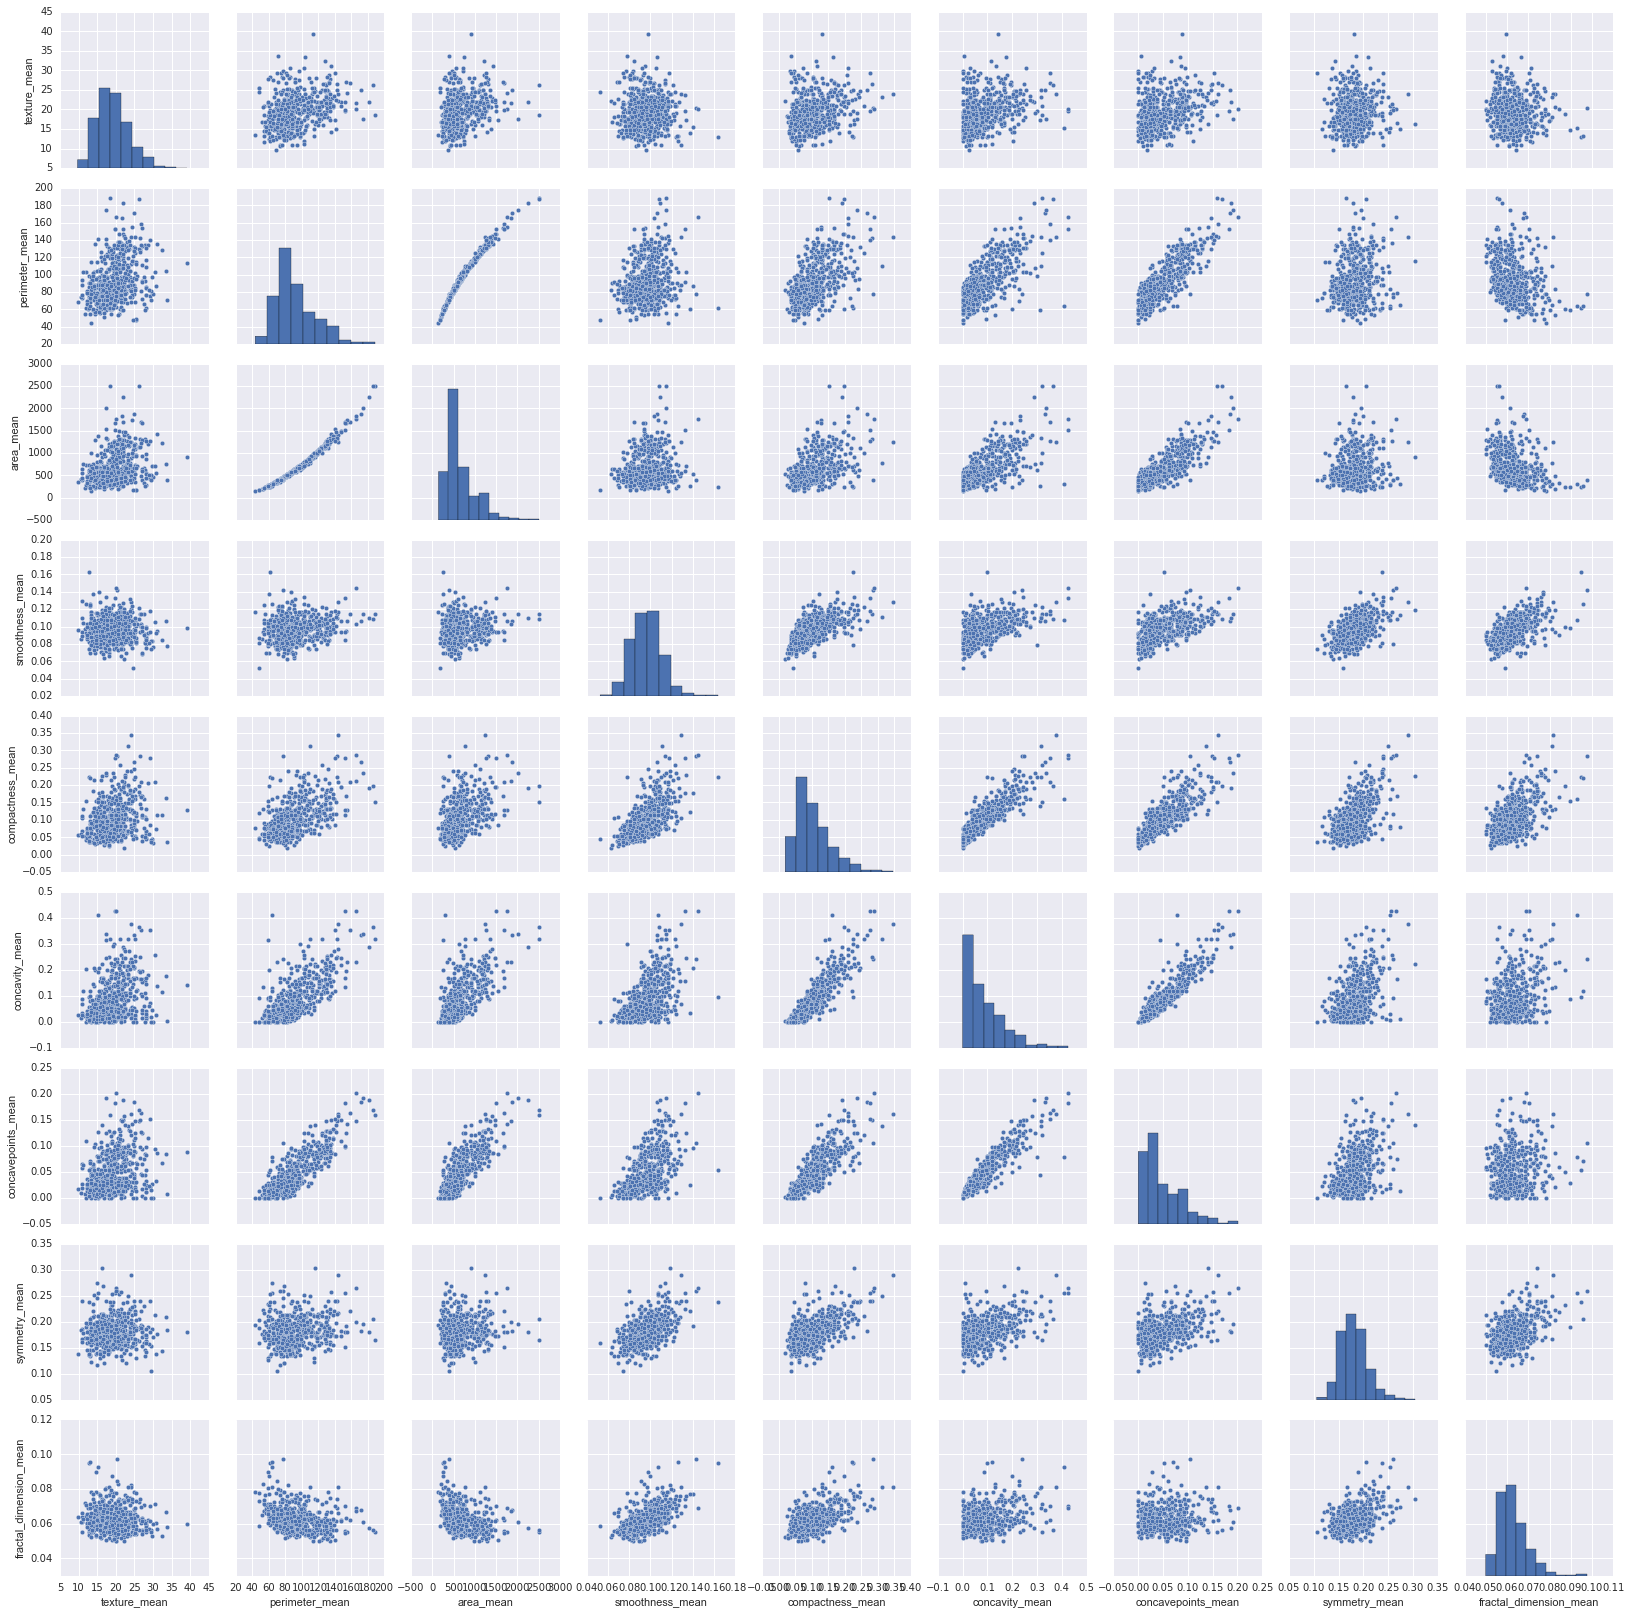

In [703]:
sns.pairplot(df[means])
# When looking at means, we see some correlations.
# Perimeter correlates with area, as expected because of math. 
# It also correlates with concavity and concave points, as, intuitively, does area mean.
# Smoothness has some correlation with many of the later variables, most notably with compactness. 
# There appears to be a relation between compactness and concavity. 
# The two measures related to concavity appear to correlate to each other as well. 

# The most interesting associations here are perimeter/concavity, smoothness/compactness, and compactness/concavity. 

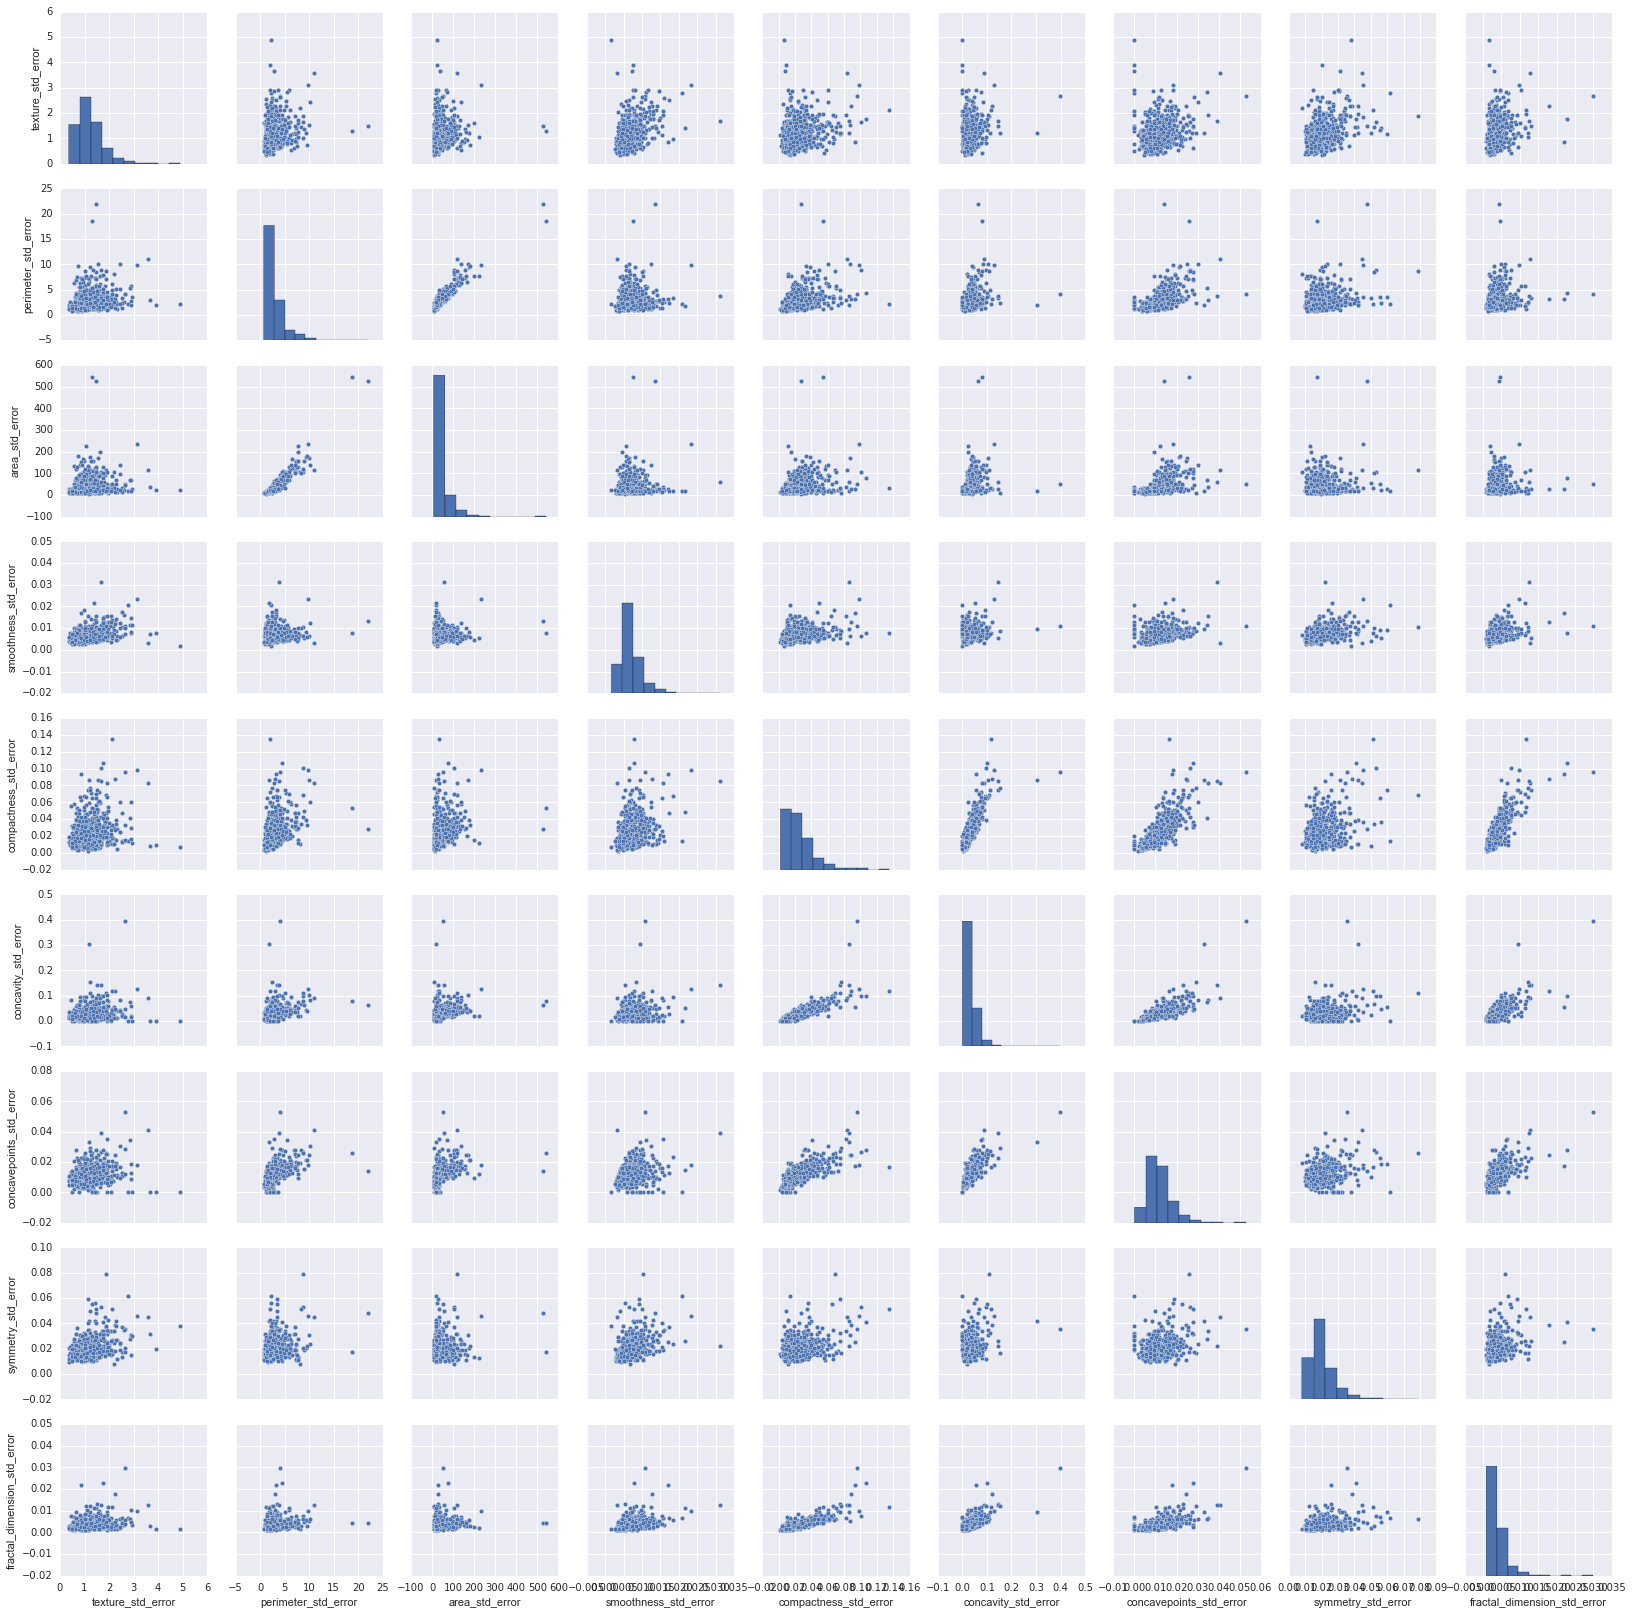

In [704]:
sns.pairplot(df[std_errors])

#Correlations in the standard error measures follow similar trends, but seem less strongly correlated. 
#Area and perimeter jump out as strongly related, again, obviously. 
#Compactness/concavity and compactness/fractal dimension are also obvious correlations.

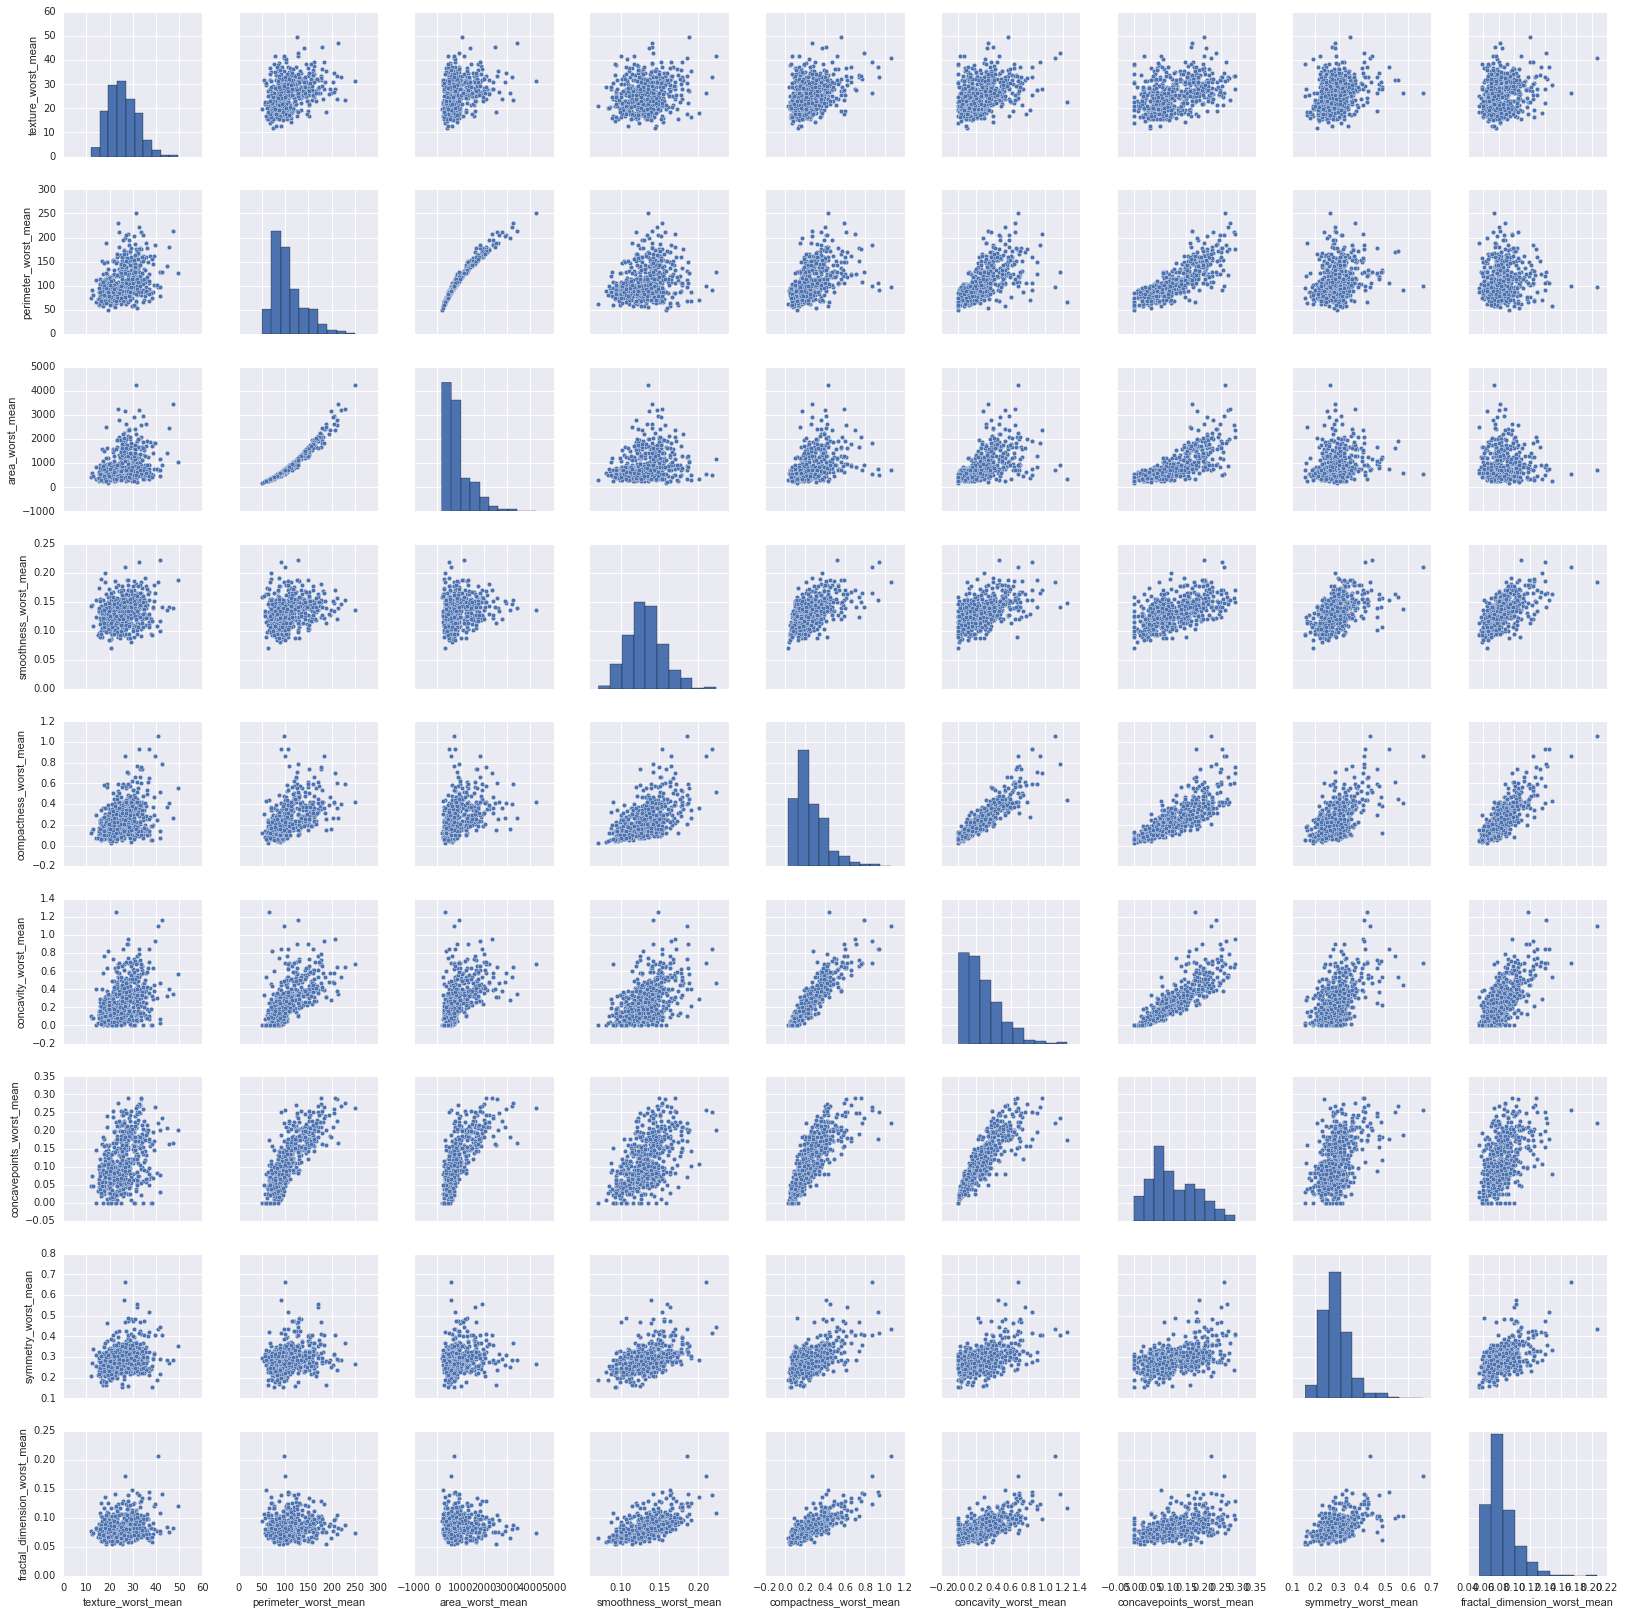

In [705]:
sns.pairplot(df[worst_means])
# worst means relates to means, so most of the same patterns are obvious. 

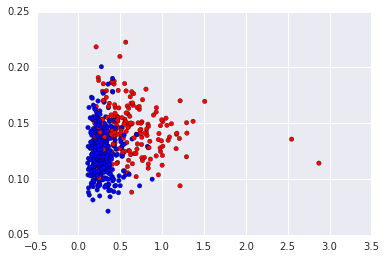

In [708]:
plt.scatter(df.radius_std_error, df.smoothness_worst_mean, c=df.diagnosis, cmap='bwr')

# This plot maps the two features that had the highest coefficients against each other. 
# While a slight correlation may be obvious, this becomes a much more powerful visualization when we add the target.
# By adding a color visualization to represent the different diagnosis points, a strong pattern emerges. 
# The data separates into clear clusters. There is definitely some overlap, but the general pattern is clear. 

## 8. Provide a one-sentence summary for a non-technical audience. Then provide a longer paragraph-length technical explanation.

There are 12 features that have a better-than-random-chance likelihood of predicting malignancy of a tumor, the top of which are radius, texture, symmetry, and various measures of concavity.

We analyzed 568 datapoints, with 3 measures for each of 10 features. We ran a logistic regression on this data to determine which features showed the strongest ability to determine whether a tumor was malignant, and therefore whether a patient had cancer. By scaling our data and tuning it (via LogisticRegressionCV to determine the optimum penalty for regularization), we were able to create a model that predicted our test data with 96% accuracy when cross validated. The most effective feature in predicting results was the standard error measure of radius, followed by five features' worst means (texture, concave points, symmetry, concavity, and radius). There were six additional features that predicted cancer with a better than 50% probability, but it is important not to overfit our model by using too many features, so be aware when tweaking this model moving forward of how many features to include and test for. 